In [1]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import punkt

# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
from gensim.models import KeyedVectors
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from imblearn.under_sampling import RandomUnderSampler
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import *
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from keras.optimizers import RMSprop
from tensorflow import keras
import multiprocessing
cores = multiprocessing.cpu_count()
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from sklearn import utils
from keras.utils import to_categorical
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 


In [3]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)

In [4]:
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)

train['question1'] = train.question1.apply(clean_data)
train['question2'] = train.question2.apply(clean_data)
test['question1'] = test.question1.apply(clean_data)
test['question2'] = test.question2.apply(clean_data)

# train, validation = train_test_split(train, test_size=0.1)

In [6]:
train_sen1 = train['question1']
train_sen2 = train['question2']
test_sen1 = test['question1']
test_sen2 = test['question2']

In [7]:
embeddings_index = {}
f = open('datasets/glove.840B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()
print('Found %s word vectors.' % len(embeddings_index))


Found 51876 word vectors.


In [8]:
stop_words = stopwords.words('english')
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())



In [10]:
xtrain_sen1_glove = [sent2vec(x) for x in train_sen1]
xtrain_sen2_glove = [sent2vec(x) for x in train_sen2]
xtest_sen1_glove = [sent2vec(x) for x in test_sen1]
xtest_sen2_glove = [sent2vec(x) for x in test_sen2]

In [11]:
xtrain_sen1_glove = np.array(xtrain_sen1_glove)
xtrain_sen2_glove = np.array(xtrain_sen2_glove)
xtest_sen1_glove = np.array(xtest_sen1_glove)
xtest_sen2_glove = np.array(xtest_sen2_glove)

In [12]:
y_train = train["is_duplicate"].values
y_test = test["is_duplicate"].values

In [20]:
X_train = xtrain_sen1_glove + xtrain_sen2_glove
X_test = xtest_sen1_glove + xtest_sen2_glove

In [44]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.6891554346482008
Testing F1 score: 0.6654044117473992


Classification Report
               precision    recall  f1-score   support

           0       0.70      0.88      0.78     25453
           1       0.64      0.37      0.47     14982

    accuracy                           0.69     40435
   macro avg       0.67      0.62      0.63     40435
weighted avg       0.68      0.69      0.67     40435



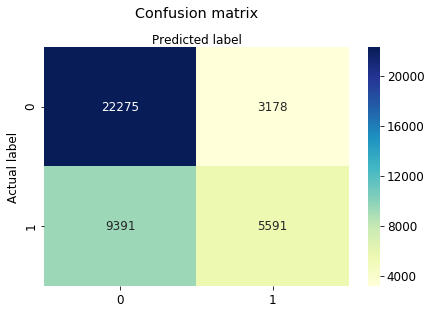

In [45]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

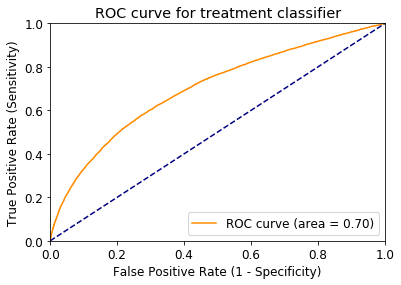

In [46]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [14]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7842215902065043
Testing F1 score: 0.7729378490586456


Classification Report
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     25671
           1       0.80      0.55      0.65     14764

    accuracy                           0.78     40435
   macro avg       0.79      0.73      0.75     40435
weighted avg       0.79      0.78      0.77     40435



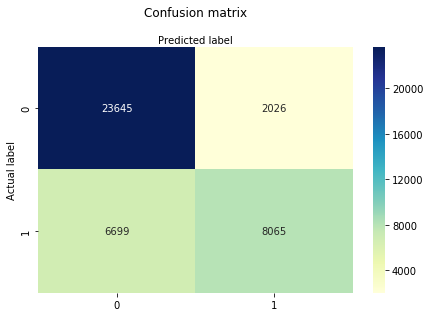

In [15]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

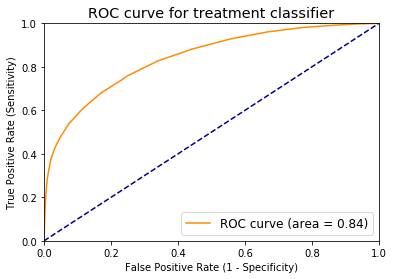

In [17]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [21]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [22]:
X_resampled, y_resampled = undersampleData(X_train, y_train)

In [23]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_resampled, y_resampled)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7625324595029059
Testing F1 score: 0.7630479675180676


Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     25671
           1       0.67      0.69      0.68     14764

    accuracy                           0.76     40435
   macro avg       0.74      0.75      0.75     40435
weighted avg       0.76      0.76      0.76     40435



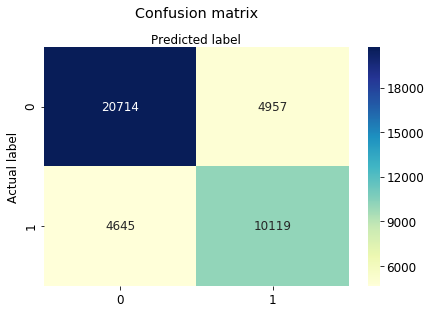

In [24]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

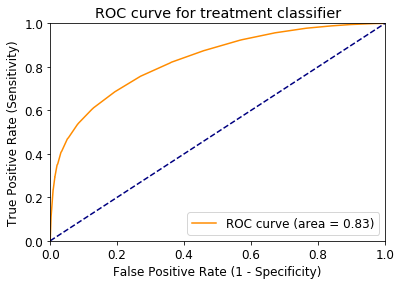

In [25]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [26]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.65445777173241
Testing F1 score: 0.6598850917704312


Classification Report
               precision    recall  f1-score   support

           0       0.76      0.67      0.71     25671
           1       0.52      0.64      0.57     14764

    accuracy                           0.65     40435
   macro avg       0.64      0.65      0.64     40435
weighted avg       0.67      0.65      0.66     40435



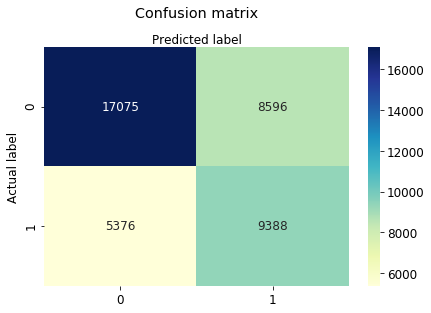

In [27]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)


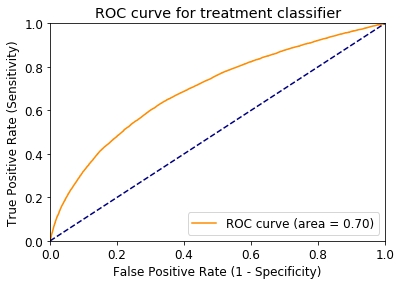

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 